<a href="https://colab.research.google.com/github/aleksakom/age-emotions-and-gender-detection/blob/main/Age%2C_gender_and_emotions_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importovanje neophodnih biblioteka ya dalji rad
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
#unzipovanje fajla gde se nalaze slike
!unzip data.zip -d Data

Archive:  data.zip
  inflating: Data/data/30_1_0httpssmediacacheakpinimgcomxdcfdcfedfaedadjpg.jpg  
  inflating: Data/data/30_1_0httpssmediacacheakpinimgcomxfeebfdccajpg.jpg  
  inflating: Data/data/30_1_0httpssmediacacheakpinimgcomxffeabacaaejpg.jpg  
  inflating: Data/data/30_1_0httpssmediacacheakpinimgcomxffecfafddjpg.jpg  
  inflating: Data/data/30_1_0httpuploadwikimediaorgwikipediacommonsthumbaMadonnaRotterdamjpgpxMadonnaRotterdamjpg.jpg  
  inflating: Data/data/30_1_0httpwwwbeastiemaniacomwhoismadonnamadonnajpg.jpg  
  inflating: Data/data/35_0_0httpmediacacheecpinimgcomxffeffbcefjpg.jpg  
  inflating: Data/data/35_0_0httpssmediacacheakpinimgcomxfcfcbaeaeddabbjpg.jpg  
  inflating: Data/data/35_0_0httpssmediacacheakpinimgcomxfefdacfbfdeadajpg.jpg  
  inflating: Data/data/35_0_0httpsuploadwikimediaorgwikipediacommonsthumbEltonJohninsjpgpxEltonJohninsjpg.jpg  
  inflating: Data/data/35_0_0httpwwwlautdeEltonJohneltonjohnjpg.jpg  
  inflating: Data/data/35_1_0httpafilesbiographycomim

In [3]:
# postavljanje dirketorijuma
BASE_DIR = '/content/Data/data'

In [4]:
# kreiranje labela za godine i pol
image_paths = []
age_labels = []
gender_labels = []

# splitovanje path-a gde se uzima nulti i prvi clan, ondnosno godina i pol
for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/117 [00:00<?, ?it/s]

In [5]:
# konvertovanje u data frame i prikaz
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/Data/data/44_0_0httpssmediacacheakpin...,44,0
1,/content/Data/data/44_1_0httpssmediacacheakpin...,44,1
2,/content/Data/data/44_0_0httpssmediacacheakpin...,44,0
3,/content/Data/data/30_1_0httpssmediacacheakpin...,30,1
4,/content/Data/data/70_0_0httpspmctvlinefileswo...,70,0


In [6]:
# mapiranje labela za pol
gender_dict = {0:'Male', 1:'Female'}

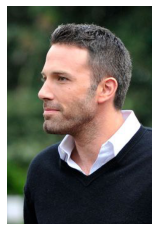

In [7]:
# prikaz slike sa indeksom 0
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

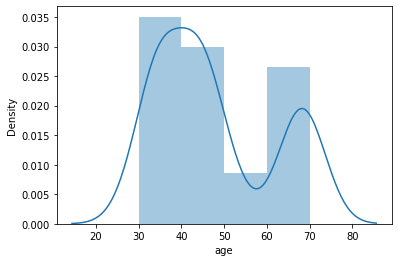

In [8]:
# distplot za godine
sns.distplot(df['age'])

Text(0, 0.5, 'count')

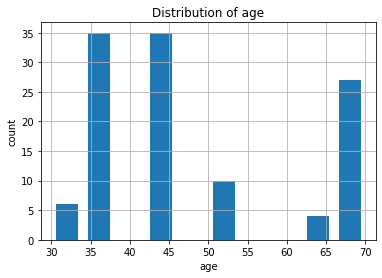

In [55]:
# distribucija godina na osnovu dataseta
df['age'].hist(rwidth=0.7)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('count')

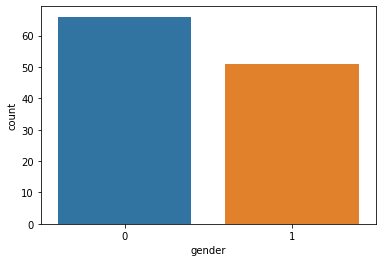

In [9]:
# countplot za pol gde se vidi da ima vise muskaraca
sns.countplot(df['gender'])

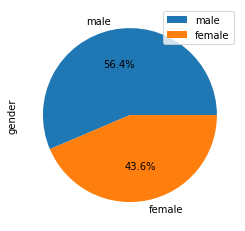

In [54]:
# prikaz pite sa odnosom muskaraca i zena i balansiranost dataseta
df['gender'].value_counts().plot.pie(autopct="%1.1f%%", labels = ['male' , 'female'])
plt.legend()

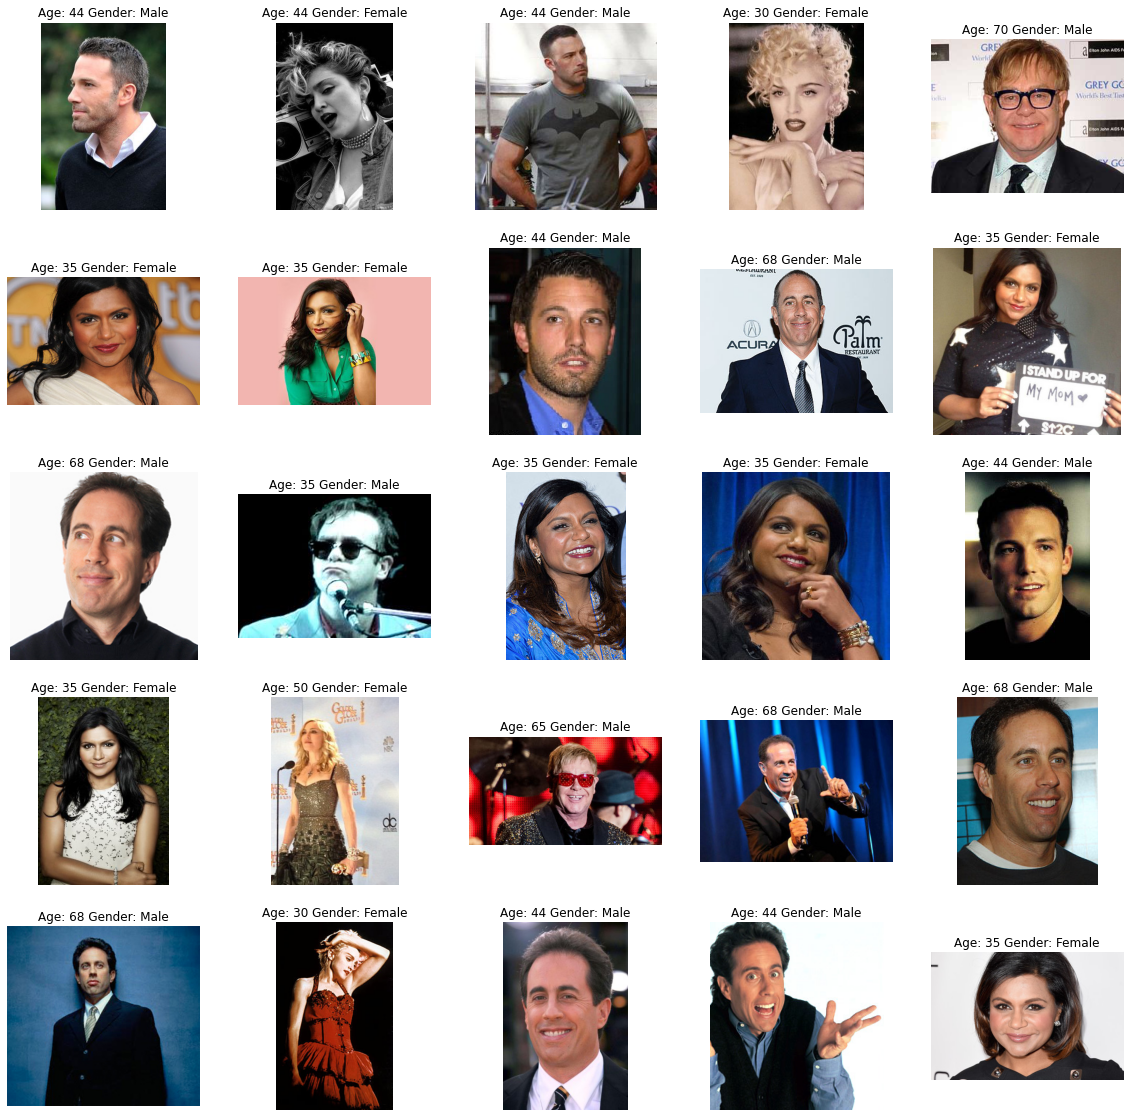

In [10]:
# da bi se prikazao grid slika
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [11]:
# ekstrakcija slika
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)

    features = features.reshape(len(features), 128, 128, 1)
    return features

In [12]:
# Ekstrakcija karakteristika ima za cilj da smanji broj karakteristika u skupu podataka
# kreiranjem novih karakteristika od postojećih (a zatim odbacivanjem originalnih karakteristika)
X = extract_features(df['image'])

  0%|          | 0/117 [00:00<?, ?it/s]

In [13]:
# shape je tuple koji uvek daje dimenzije niza
X.shape

(117, 128, 128, 1)

In [14]:
# normalizacija slika
X = X/255.0

In [15]:
# kreiranje promenjivih
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [16]:
input_shape = (128, 128, 1)

In [17]:
inputs = Input((input_shape))
# konvolucioni slojevi
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# potpuno povezani slojevi
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

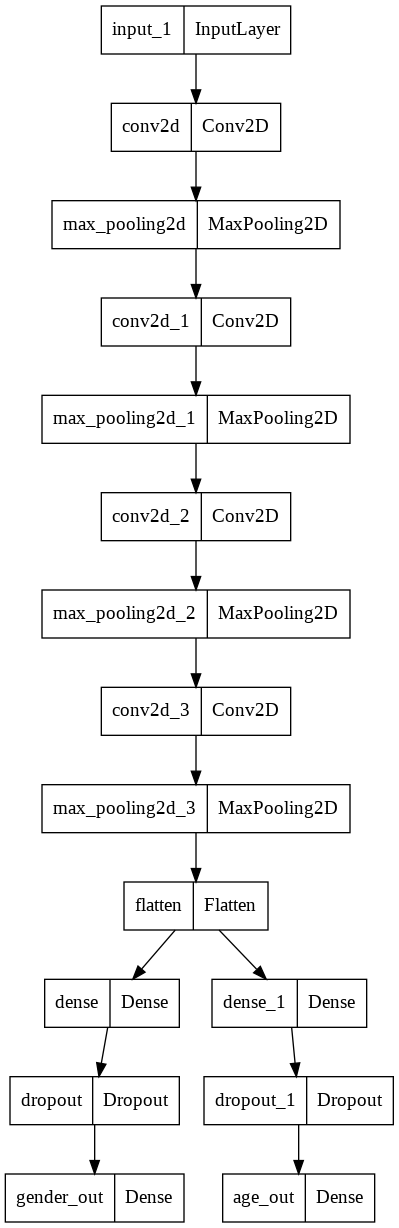

In [18]:
# plotovanje modela
from tensorflow.keras.utils import plot_model
plot_model(model)

In [19]:
# treniranje modela
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 46.0727 - gender_out_loss: 0.7602 - age_out_loss: 45.3125 - gender_out_accuracy: 0.4946 - age_out_accuracy: 0.0000e+00 - val_loss: 23.1691 - val_gender_out_loss: 0.7316 - val_age_out_loss: 22.4375 - val_gender_out_accuracy: 0.5000 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 23.1423 - gender_out_loss: 0.9030 - age_out_loss: 22.2393 - gender_out_accuracy: 0.5269 - age_out_accuracy: 0.0000e+00 - val_loss: 17.0644 - val_gender_out_loss: 0.6825 - val_age_out_loss: 16.3819 - val_gender_out_accuracy: 0.5833 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 7s 3s/step - loss: 18.0538 - gender_out_loss: 0.7513 - age_out_loss: 17.3024 - gender_out_accuracy: 0.4624 - age_out_accuracy: 0.0000e+00 - val_loss: 20.5980 - val_gender_out_loss: 0.6798 - val_age_out_loss: 19.9182 - val_gender_out_accuracy: 0.5833 - val_age_out_accuracy: 0.0000

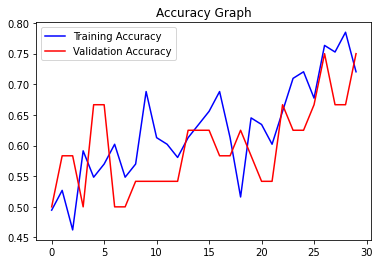

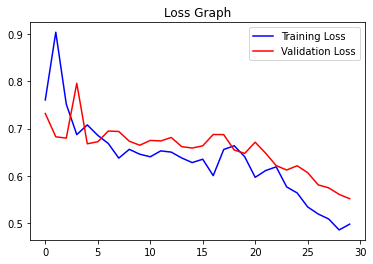

In [20]:
# plot rezultati za pol
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

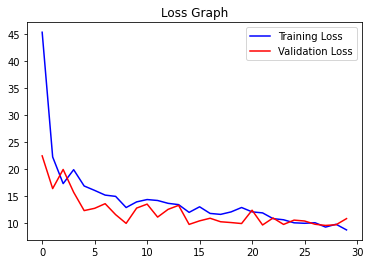

In [21]:
# plot reultati za godine
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Female Original Age: 35
Predicted Gender: Female Predicted Age: 32


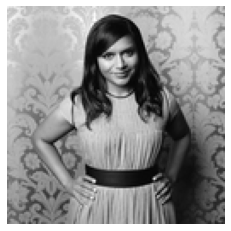

In [22]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predikcija od modela
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 30
Predicted Gender: Female Predicted Age: 32


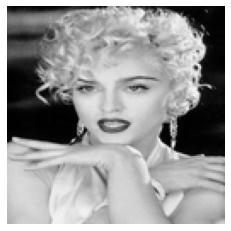

In [58]:
image_index = 3
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [60]:
!unzip emotions -d emotions

Archive:  emotions.zip
   creating: emotions/emotions/angry/
  inflating: emotions/emotions/angry/35_1_0httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg  
  inflating: emotions/emotions/angry/35_1_0httpimagesnymagcomimagesdailymindykalingxjpg.jpg  
  inflating: emotions/emotions/angry/44_0_0httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: emotions/emotions/angry/44_0_0httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg  
  inflating: emotions/emotions/angry/44_0_0httpwwwwatchidcomsitesdefaultfilesuploadsightingBreitlingwatchJerrySeinfeldjpg.jpg  
  inflating: emotions/emotions/angry/65_0_0httpsdfrpwlycscloudfrontnetdeltonjohnjpg.jpg  
   creating: emotions/emotions/disguist/
  inflating: emotions/emotions/disguist/30_1_0httpssmediacacheakpinimgcomxfeebfdccajpg.jpg  
  inflating: emotions/emotions/disguist/30_1_0httpuploadwikimediaorgwikipediacommonsthumbaMadonnaRotterdamjpgpxMadonnaRotterdamjpg.jpg  
  inflating: emotions/emotions/disguist/35_1_0httpwww

In [61]:
!unzip eval -d val

Archive:  eval.zip
   creating: val/eval/angry/
  inflating: val/eval/angry/44_0_0httpwwwwatchidcomsitesdefaultfilesuploadsightingBreitlingwatchJerrySeinfeldjpg.jpg  
  inflating: val/eval/angry/65_0_0httpsdfrpwlycscloudfrontnetdeltonjohnjpg.jpg  
   creating: val/eval/disguist/
  inflating: val/eval/disguist/35_1_0httpwwwpictureszimbiocomfpMindyKalingfBgaONVFDFmjpg.jpg  
  inflating: val/eval/disguist/44_1_0httpssmediacacheakpinimgcomxaaeaaeecccaedfebdbjpg.jpg  
   creating: val/eval/happy/
  inflating: val/eval/happy/35_0_0httpssmediacacheakpinimgcomxfcfcbaeaeddabbjpg.jpg  
  inflating: val/eval/happy/35_1_0httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg  
  inflating: val/eval/happy/35_1_0httpssmediacacheakpinimgcomxcccccddbbfedabjpg.jpg  
  inflating: val/eval/happy/44_1_0httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg  
  inflating: val/eval/happy/50_1_0httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg  
  inflating

In [62]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

#kreiranje modela
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [63]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy'])

In [64]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/emotions/emotions", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 63 images belonging to 4 classes.


{'angry': 0, 'disguist': 1, 'happy': 2, 'neutral': 3}

In [65]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/val/eval", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 16 images belonging to 4 classes.


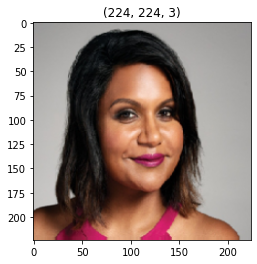

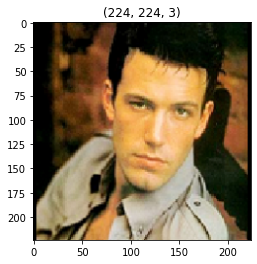

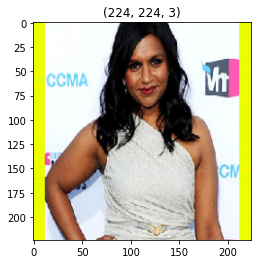

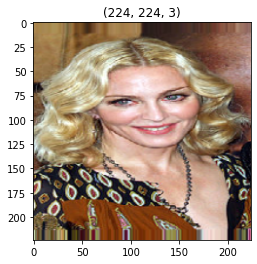

In [68]:
#za vizualizaciju slika

t_img , label = train_data.next()

#funkcija koja se poziva omogucava ucitavanje slika
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 4:
      break

# funkcija poziva plotovanje slika
plotImages(t_img, label)

In [70]:
# Ucitavanje najbolje fitovanog modela
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [71]:
# da se mapiraju o/p vrednosti 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 The image is of a happy person! :)


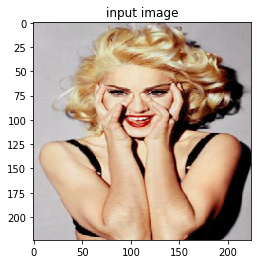

In [74]:
# putanja do slike kako bi se detektovala emocija

path = "/content/val/eval/happy/44_1_0httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" The image is of a {op[pred]} person! :)")

# za prikaz slike
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()